# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
np.random.seed(sum(map(ord, "aesthetics"))) 

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


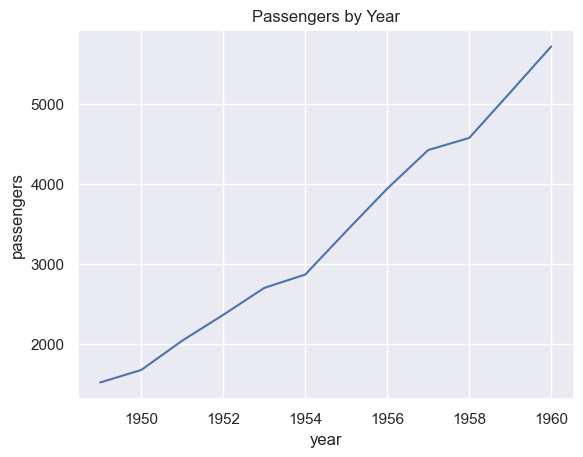

In [4]:
# seabon画图确实好看
sns.set()
sns.lineplot(x = "year", y = "passengers", estimator = "sum", data = data, errorbar = None )
plt.xlabel('year')
plt.ylabel('passengers')
plt.title('Passengers by Year')
plt.show()


In [5]:
# 按照年份对乘客数量进行求和,先用groupby()函数按年份分类，再求和
grouped_data = data.groupby('year')['passengers'].sum()
grouped_data

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

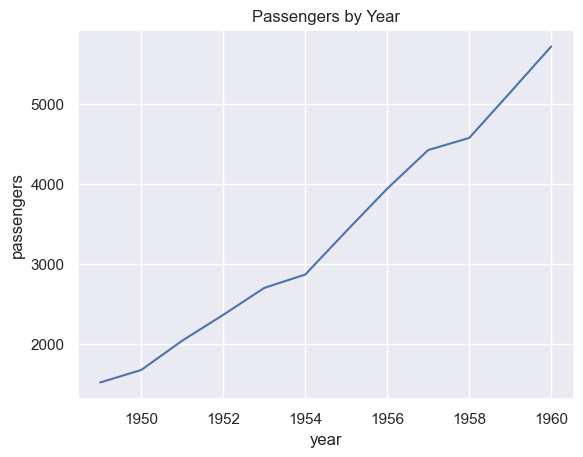

In [6]:
# matplotlib
# 获取横轴数据和纵轴数据
x = grouped_data.index
y = grouped_data.values

plt.plot(x, y)
plt.xlabel('year')
plt.ylabel('passengers')
plt.title('Passengers by Year')
plt.show()

In [7]:
grouped_data = data.groupby('month')['passengers'].sum()
grouped_data

month
Jan    2901
Feb    2820
Mar    3242
Apr    3205
May    3262
Jun    3740
Jul    4216
Aug    4213
Sep    3629
Oct    3199
Nov    2794
Dec    3142
Name: passengers, dtype: int64

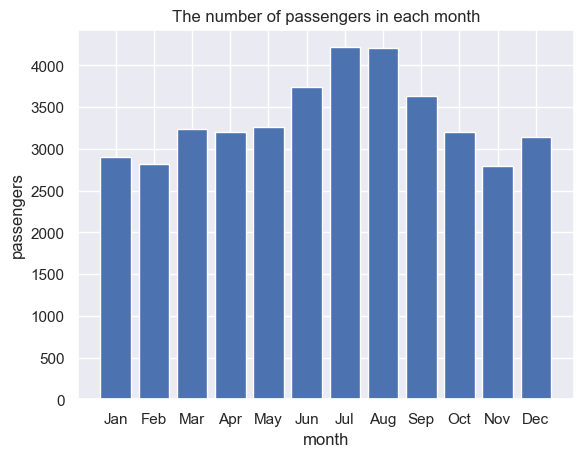

In [8]:
plt.bar(data.groupby('month')['passengers'].sum().index, data['passengers'].groupby(data['month']).sum())
plt.xlabel('month')
plt.ylabel('passengers')
plt.title('The number of passengers in each month')
plt.show()

In [13]:
# hls!
sns.set_palette(sns.color_palette("hls", 10)) 
current_palette = sns.color_palette()


Text(0.5, 1.0, 'The number of passengers in each month')

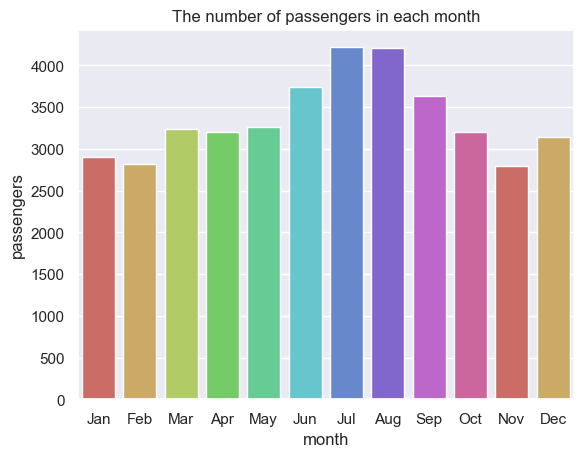

In [14]:
sns.barplot(x="month", y="passengers", estimator="sum", data=data, errorbar=None, palette=current_palette)
plt.title('The number of passengers in each month')

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [15]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


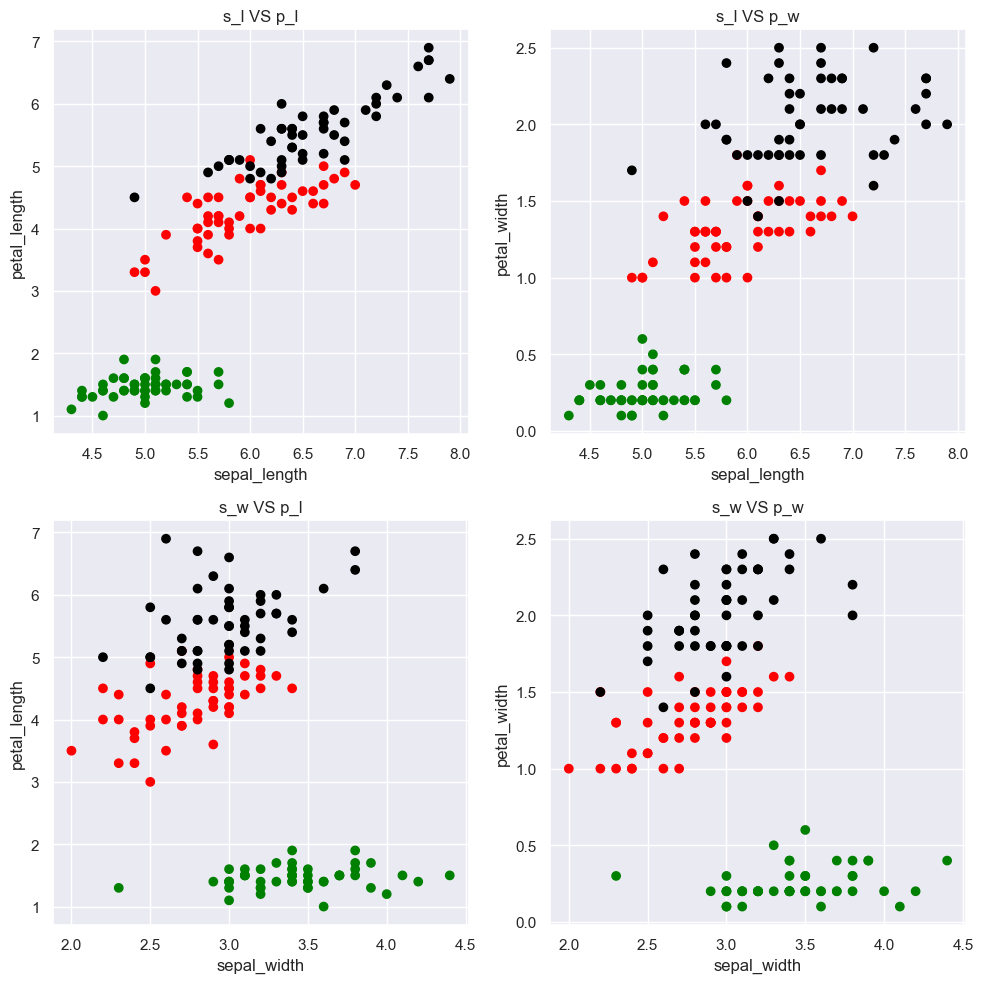

In [16]:
# 2.1matplotlib
color_map={'setosa':'green', 'versicolor':'red', 'virginica':'black'}
colors=data['species'].map(color_map)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plot_data = [
    {"x": "sepal_length", "y": "petal_length", "title": "s_l VS p_l"},
    {"x": "sepal_length", "y": "petal_width", "title": "s_l VS p_w"},
    {"x": "sepal_width", "y": "petal_length", "title": "s_w VS p_l"},
    {"x": "sepal_width", "y": "petal_width", "title": "s_w VS p_w"}
]

# for循环画画画
for i, ax in enumerate(ax.flat):
    ax.scatter(data[plot_data[i]["x"]], data[plot_data[i]["y"]],c=colors)
    ax.set_title(plot_data[i]["title"])
    ax.set_xlabel(plot_data[i]["x"])
    ax.set_ylabel(plot_data[i]["y"])

plt.tight_layout()
plt.show()

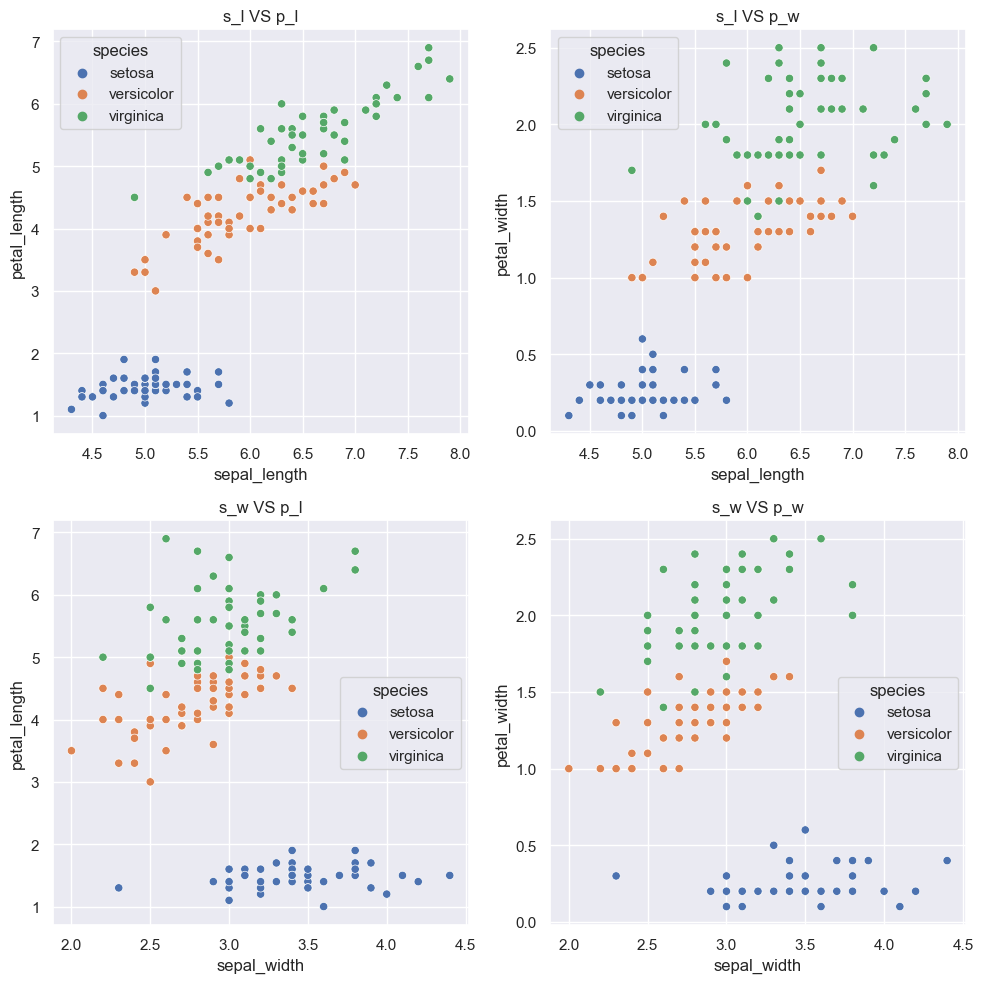

In [17]:
# 2.1 seabon
sns.set()
# 循环绘制子图
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plot_data = [
    {"x": "sepal_length", "y": "petal_length", "title": "s_l VS p_l"},
    {"x": "sepal_length", "y": "petal_width", "title": "s_l VS p_w"},
    {"x": "sepal_width", "y": "petal_length", "title": "s_w VS p_l"},
    {"x": "sepal_width", "y": "petal_width", "title": "s_w VS p_w"}
]

for i, ax in enumerate(ax.flat):
    sns.scatterplot(x=plot_data[i]["x"], y=plot_data[i]["y"],hue='species' ,data=data, ax=ax)
    ax.set_title(plot_data[i]["title"])
    ax.set_xlabel(plot_data[i]["x"])
    ax.set_ylabel(plot_data[i]["y"])

plt.tight_layout()
plt.show()

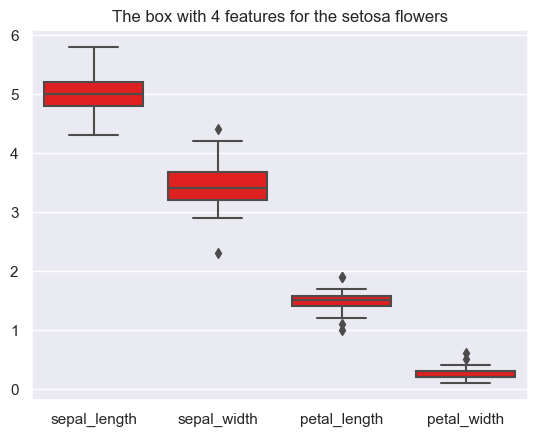

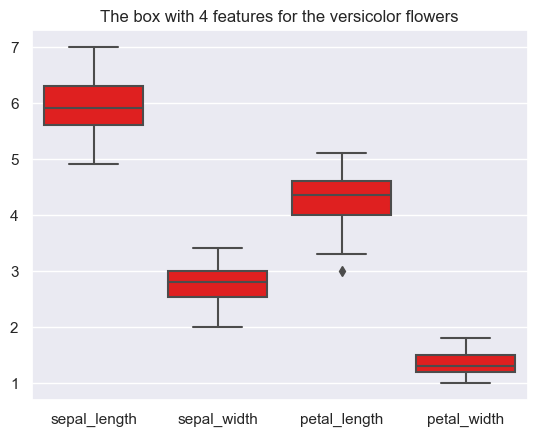

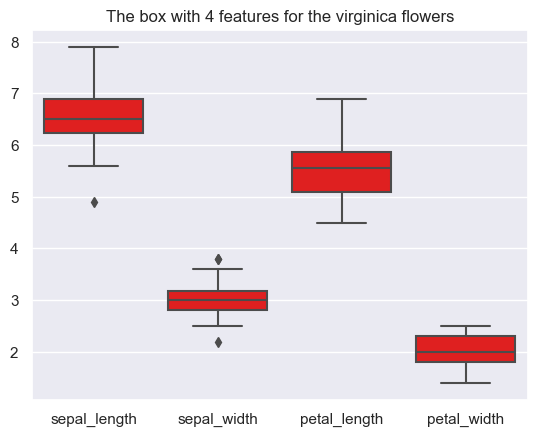

In [18]:
# 2.2
species_list = data["species"].unique()
for species in species_list:
    selected_data = data.loc[data["species"] == species]
    sns.boxplot(data=selected_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]], color='red')
    plt.title(f"The box with 4 features for the {species} flowers")
    plt.show()

C:\Users\huang\anaconda3\Lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

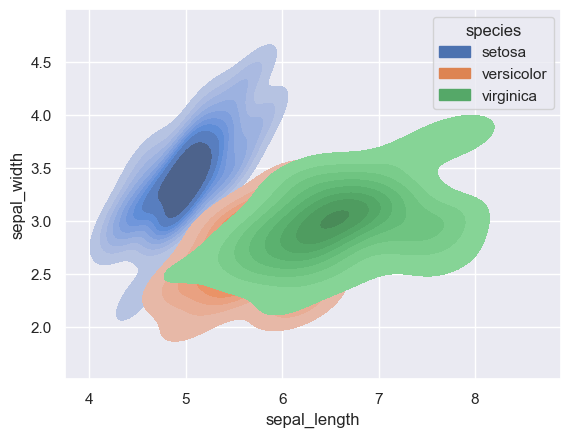

In [19]:
sns.kdeplot(data=data, x="sepal_length", y="sepal_width", hue="species", fill=True, cmap="coolwarm")

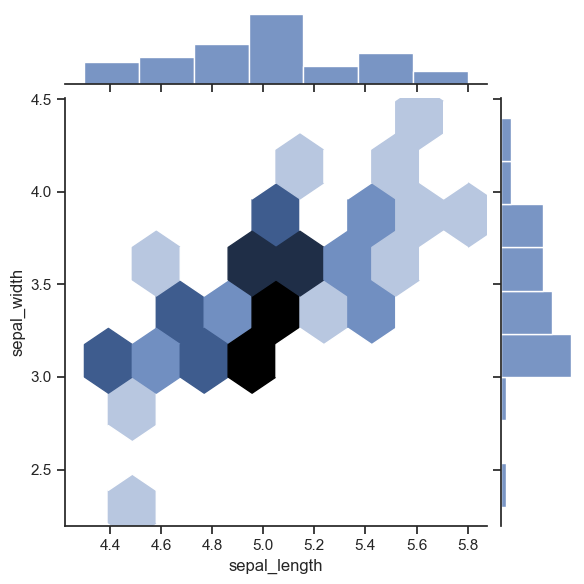

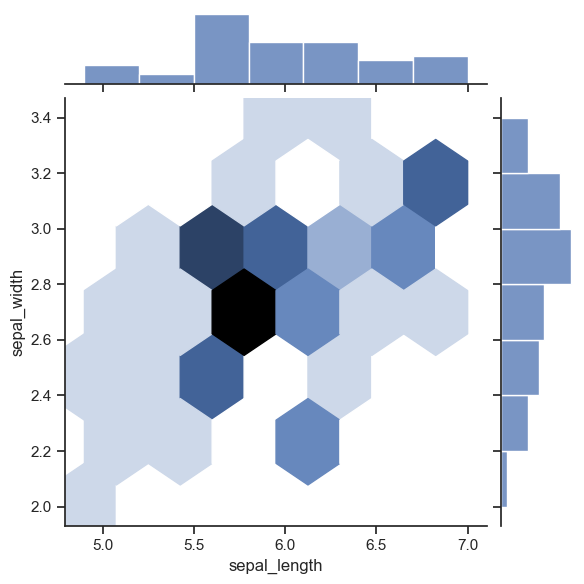

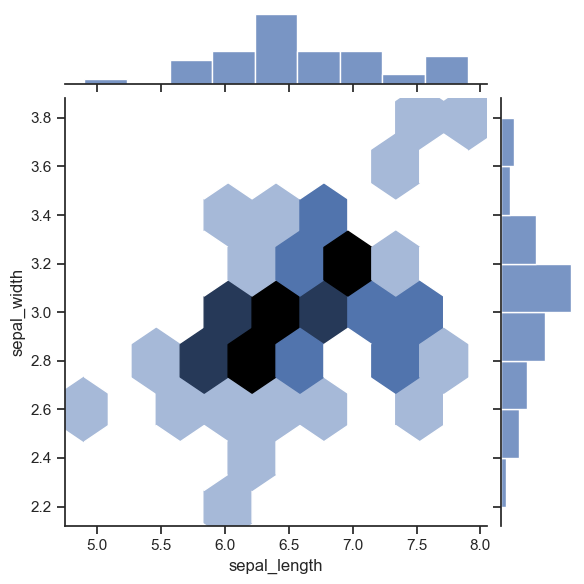

In [20]:
# 2.3
for species in species_list:
    selected_data = data.loc[data["species"] == species]
    with sns.axes_style("ticks"):
        sns.jointplot(x=selected_data["sepal_length"], y=selected_data["sepal_width"], data=data, kind="hex")


## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [18]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


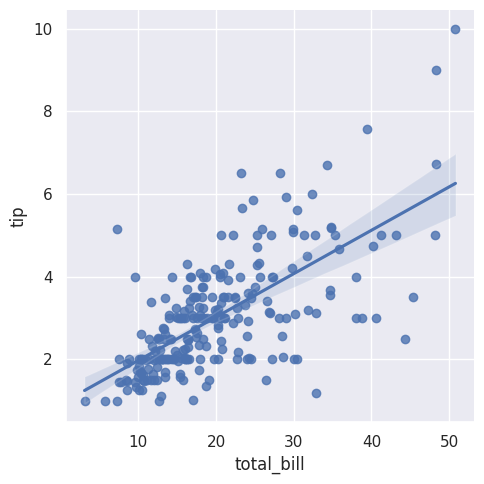

In [19]:
# 3.1
sns.set()
sns.lmplot(x="total_bill", y="tip", data=data) 

<Axes: xlabel='day', ylabel='total_bill'>

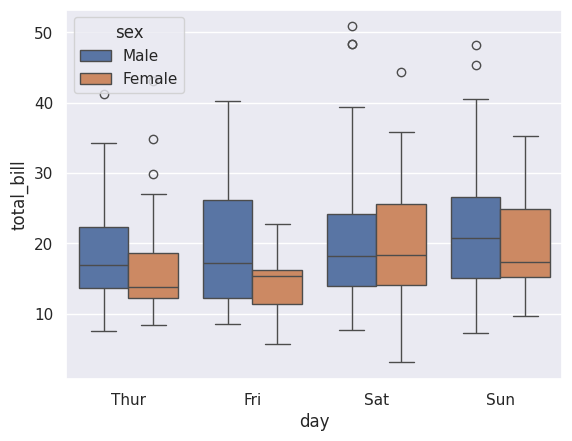

In [20]:
# 3.2
sns.boxplot(x="day", y="total_bill", hue="sex", data=data)

<Axes: xlabel='day', ylabel='total_bill'>

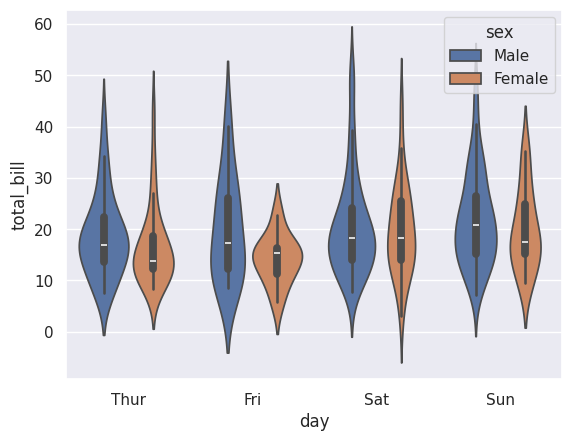

In [21]:
# 3.2提琴图
sns.violinplot(x="day", y="total_bill", hue="sex", data=data)

<Axes: xlabel='day', ylabel='total_bill'>

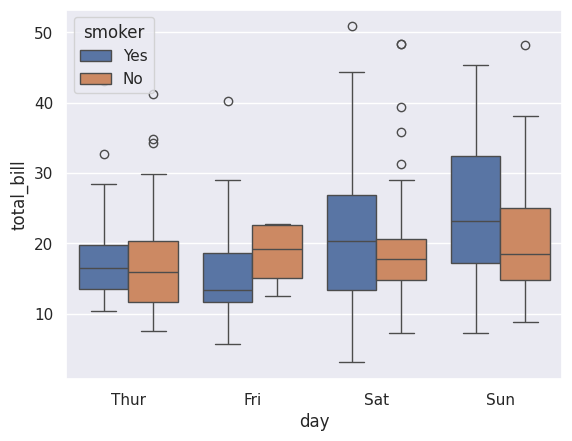

In [22]:
# 3.3
sns.boxplot(x="day", y="total_bill", hue="smoker", data=data)

<Axes: xlabel='day', ylabel='total_bill'>

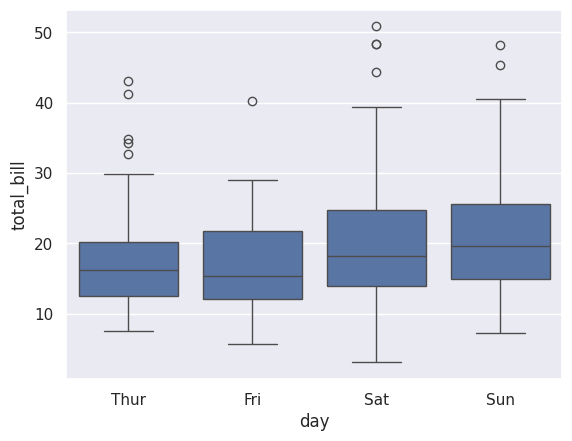

In [23]:
# 3.4
sns.boxplot(x="day", y="total_bill", data=data)

<Axes: xlabel='time', ylabel='total_bill'>

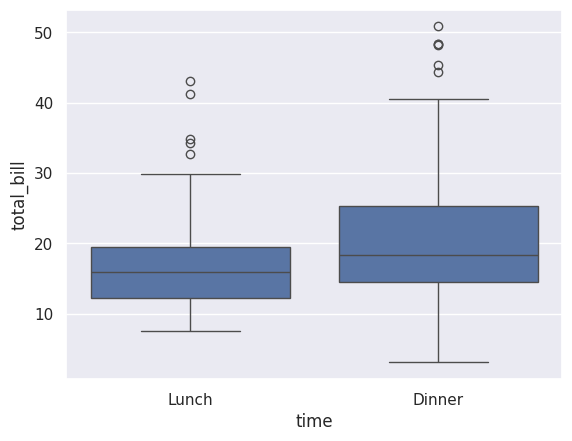

In [24]:
# 3.5
sns.boxplot(x="time", y="total_bill", data=data)

<Axes: xlabel='size', ylabel='total_bill'>

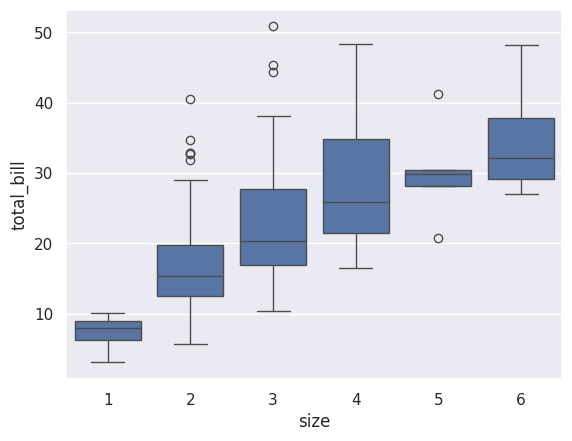

In [25]:
# 3.6
sns.boxplot(x="size", y="total_bill", data=data)

<Axes: xlabel='sex', ylabel='total_bill'>

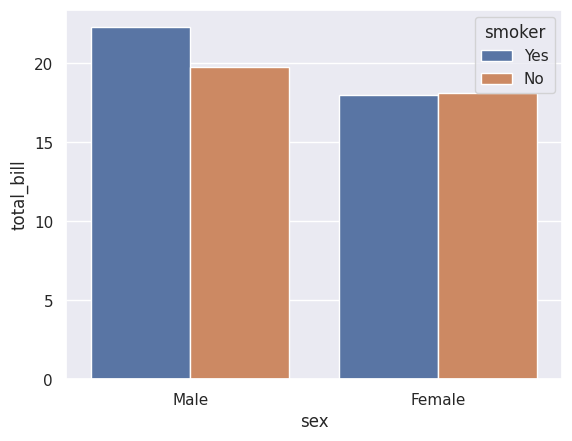

In [26]:
# 3.7
sns.barplot(x="sex", y="total_bill", hue="smoker", data=data,errorbar=None) 

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [23]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='survived'>

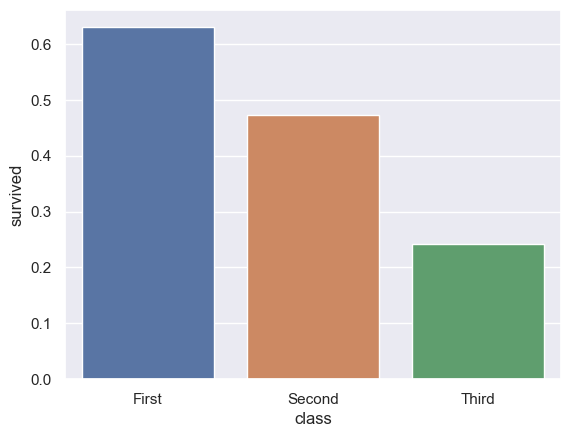

In [24]:
# 4.1
sns.barplot( y="survived", x="class", data=data, errorbar=None) 

<Figure size 800x600 with 0 Axes>

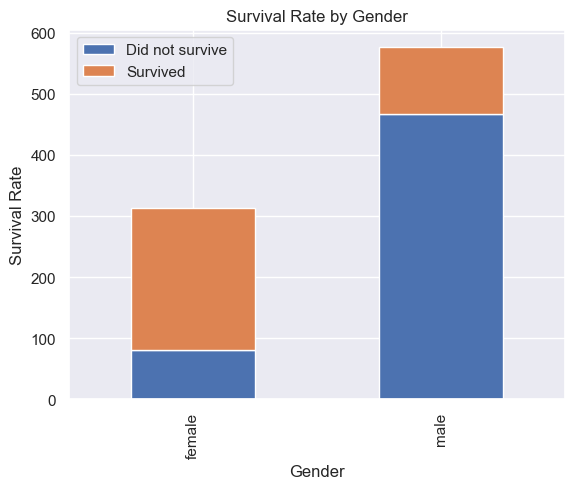

In [25]:
# 4.2
import pandas as pd

# 使用pandas进行数据处理
stacked_data = data.groupby('sex')['survived'].value_counts().unstack()

# 绘制堆积柱状图
plt.figure(figsize=(8, 6))
stacked_data.plot(kind='bar', stacked=True)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
legend_labels = ['Did not survive', 'Survived']
plt.legend(legend_labels)

# 显示图形
plt.show()

Text(0, 0.5, 'Fare')

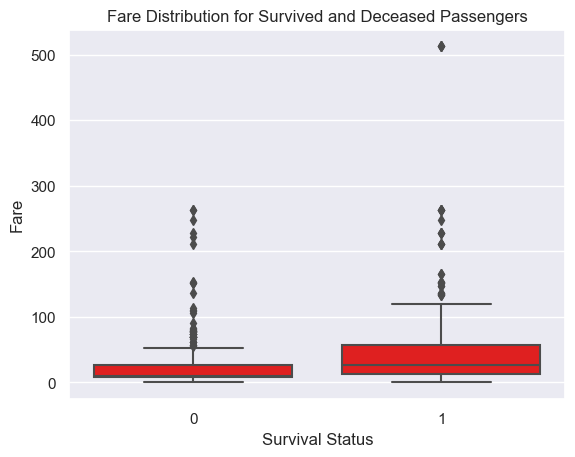

In [26]:
# 4.3
sns.boxplot(data=data, x="survived", y="fare", color='red')
plt.title("Fare Distribution for Survived and Deceased Passengers")
plt.xlabel("Survival Status")
plt.ylabel("Fare")

<Axes: xlabel='survived', ylabel='age'>

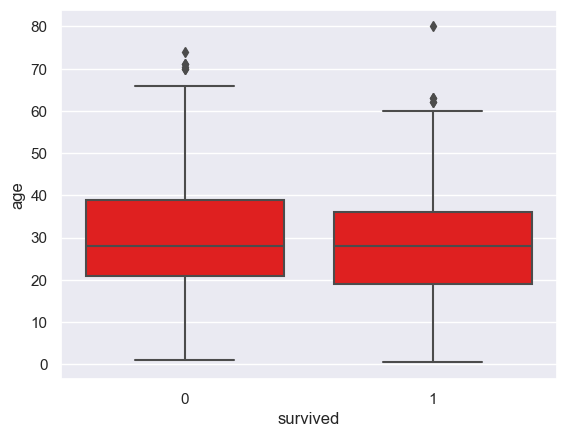

In [27]:
# 4.4
sns.boxplot(data=data, x="survived", y="age", color='red')

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


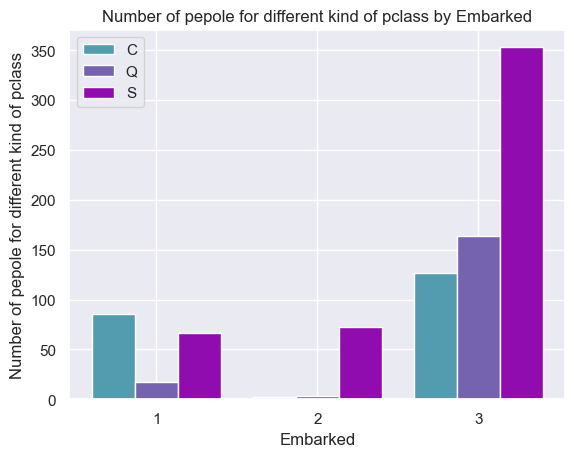

In [29]:


def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    print(size_by_embarked_pclass)
    _, ax = plt.subplots()
    total_width = 0.8
    ind_width = total_width / len(y_data_list)
    alteration = np.arange(-total_width/2+ind_width/2,
                           total_width/2+ind_width/2, ind_width)
    x_data = [i for i in range(len(x_data))]                                         #设置bars位置    
    for i in range(0, len(y_data_list)):
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i],
               label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(np.linspace(0,2,3))
    ax.set_xticklabels(size_by_embarked_pclass.columns)
    ax.legend(loc = 'upper left')


groupedbarplot(x_data = size_by_embarked_pclass.index.values
               , y_data_list = [size_by_embarked_pclass[1],
                                size_by_embarked_pclass[2],
                                size_by_embarked_pclass[3]]
               , y_data_names = ['C', 'Q', 'S']
               , colors = ['#539caf', '#7663b0', '#910caf']
               , x_label = 'Embarked'
               , y_label = 'Number of pepole for different kind of pclass'
               , title = 'Number of pepole for different kind of pclass by Embarked')

Text(0, 0.5, 'Values of sibsp')

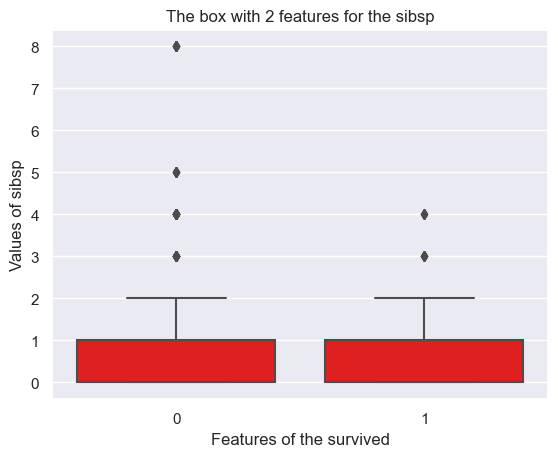

In [30]:
# 4.6
sns.boxplot(x="survived", y="sibsp", data=data, color='red')
plt.title("The box with 2 features for the sibsp")
plt.xlabel("Features of the survived")
plt.ylabel("Values of sibsp")

Text(0, 0.5, 'Values of parch')

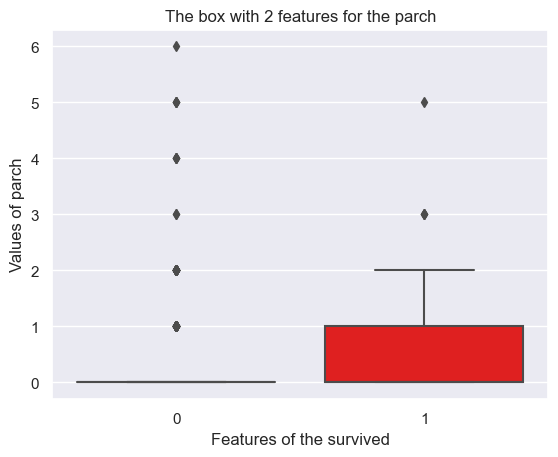

In [31]:
# 4.7
sns.boxplot(x="survived", y="parch", data=data, color='red')
plt.title("The box with 2 features for the parch")
plt.xlabel("Features of the survived")
plt.ylabel("Values of parch")

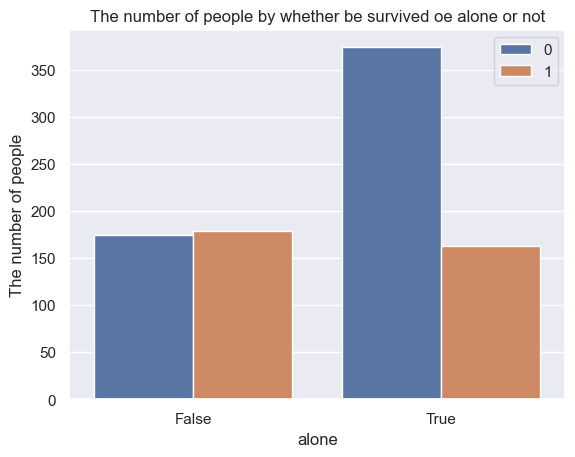

In [32]:
# 4.8
data["people"] = [1]*len(data.index)
sns.barplot(x="alone", y='people', hue="survived", estimator="sum", data=data)
plt.title("The number of people by whether be survived oe alone or not")
plt.ylabel("The number of people")
plt.legend(loc="upper right")
plt.show()
